In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 500)
%matplotlib inline

Ce coloane are setul de date ?

In [4]:
data = pd.read_csv('Rezultate_Bacalaureat_Sesiunea_I_II_2015_2017.csv')
data.columns

Index(['Unnamed: 0', 'CONTESTATIE_EA', 'CONTESTATIE_EB', 'CONTESTATIE_EC',
       'CONTESTATIE_ED', 'Clasa', 'Cod unic candidat', 'Dataset', 'Fileira',
       'Forma de învățământ', 'ITA', 'Limba modernă', 'Medie',
       'Mediu candidat', 'NOTA_CONTESTATIE_EA', 'NOTA_CONTESTATIE_EB',
       'NOTA_CONTESTATIE_EC', 'NOTA_CONTESTATIE_ED', 'NOTA_EA', 'NOTA_EB',
       'NOTA_EC', 'NOTA_ED', 'NOTE_RECUN_A', 'NOTE_RECUN_B', 'NOTE_RECUN_C',
       'NOTE_RECUN_D', 'NOTE_RECUN_EA', 'NOTE_RECUN_EB', 'NOTE_RECUN_EC',
       'NOTE_RECUN_ED', 'ORAL_IO', 'ORAL_PMO', 'PUNCTAJ DIGITALE', 'Profil',
       'Promoție', 'SCOALA', 'SCRIS_ITC', 'SCRIS_PMS', 'STATUS', 'STATUS_A',
       'STATUS_B', 'STATUS_C', 'STATUS_D', 'STATUS_EA', 'STATUS_EB',
       'STATUS_EC', 'STATUS_ED', 'Sex', 'Specializare', 'Subiect ea',
       'Subiect eb', 'Subiect ec', 'Subiect ed', 'Unitate (SIIIR)',
       'Unitate (SIRUES)'],
      dtype='object')

Cum arata setul de date ?

In [8]:
data.sample(n = 10)[['Medie', 'Fileira', 'SCOALA', 'Profil', 'Mediu candidat', 'Forma de învățământ', 'Sex', 
                     'Subiect ea', 'Subiect ec', 'Subiect ed']]

,Medie,Fileira,SCOALA,Profil,Mediu candidat,Forma de învățământ,Sex,Subiect ea,Subiect ec,Subiect ed
543094,6.76,Tehnologică,NaN,Servicii,URBAN,Zi,F,Limba română (REAL),Matematică TEHN,Geografie
237518,9.33,Vocationala,NaN,Artistic,URBAN,Zi,F,Limba română (REAL),Istorie,"Logică, argumentare și comunicare"
552724,6.13,Teoretică,NaN,Real,RURAL,Zi,M,Limba română (REAL),Matematică ST-NAT,Biologie vegetală și animală
112612,7.95,Teoretica,NaN,Real,URBAN,Zi,M,Limba română (REAL),Matematică ST-NAT,"Anatomie și fiziologie umană, genetică și ecol..."
182960,6.41,Tehnologica,118.0,Tehnic,RURAL,Zi,M,Limba română (REAL),Matematică TEHN,Chimie anorganică TEH Nivel I/II
379101,7.85,Vocațională,NaN,Teologic,RURAL,Zi,M,Limba română (REAL),Istorie,Geografie
349337,6.65,Teoretica,NaN,Real,URBAN,Zi,M,Limba română (REAL),Matematică MATE-INFO,Informatică MI C/C++
459765,8.86,Teoretică,NaN,Real,URBAN,Zi,F,Limba română (REAL),Matematică ST-NAT,"Anatomie și fiziologie umană, genetică și ecol..."
382791,6.55,Tehnologică,NaN,Servicii,URBAN,Zi,F,Limba română (REAL),Matematică TEHN,Geografie
415249,6.06,Teoretică,NaN,Real,URBAN,Zi,M,Limba română (REAL),Matematică ST-NAT,"Anatomie și fiziologie umană, genetică și ecol..."


In [9]:
# Eliminam entry-urile care nu au medie.
data = data[data['Medie'].notnull()]

Putem inspecta distributia notelor in functie de anul si sesiunea de bacalaureat.

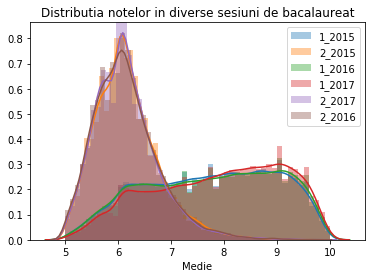

In [11]:
unique_datasets = data[data['Medie'].notnull()]['Dataset'].unique()
for dataset_val in unique_datasets:
    sns.distplot(data[data['Dataset'] == dataset_val]['Medie'], label=dataset_val)
    plt.legend()

plt.title('Distributia notelor in diverse sesiuni de bacalaureat')
plt.show()
plt.clf()

Observam ca in toti cei 3 ani, distributiile au fost foarte asemanatoare pe sesiuni. In prima sesiune, notele sunt distribuite mai uniform decat in cea de toamna, unde deviatia este mai mica (cele mai multe note sunt intre 5 si 7, cu o medie de aproximativ 6). 

Am putea verifica daca exista o diferenta semnificativa intre notele obtinute de elevii din mediul rural fata de cei din mediul urban.

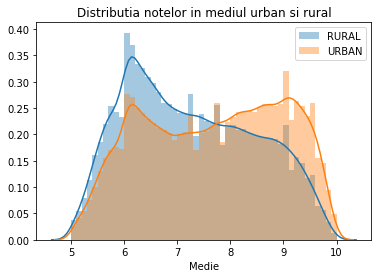

In [13]:
for env in data['Mediu candidat'].unique():
    sns.distplot(data[data['Mediu candidat'] == env]['Medie'], label=env)
    plt.legend()

plt.title('Distributia notelor in mediul urban si rural')
plt.show()
plt.clf()

Desi cele doua distributii au o suprapunere destul de mare, observam totusi ca in mediul rural exista un 'spike' de note de 6, in timp ce in mediul urban acesta este la note de 9.

Ne putem intreba, de asemenea, cum variaza distributia notelor in functie de profilul elevilor. Este oare adevarat ca elevii de la profilul real au note mai bune decat cei de la uman ? 

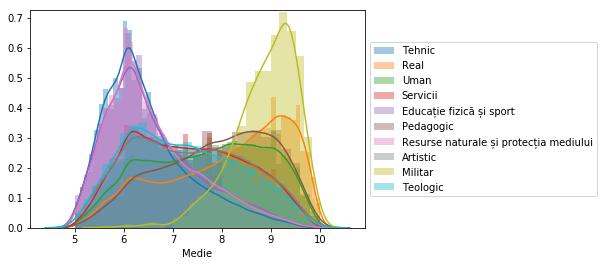

In [14]:
f = plt.figure()
for profil in data['Profil'].unique():
    sns.distplot(data[data['Profil'] == profil]['Medie'], label=profil, ax=f.gca())
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In mod surprinzator, elevii de la profilul militar prezinta distributia care are cea mai mare concentratie de note mari (cu undeva la 70% din note de 9). Desi nu este tocmai politically correct, putem compara distributia notelor fetelor vs a baietilor pentru diverse probe.



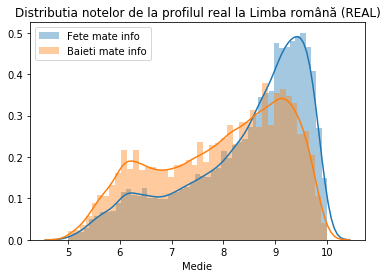

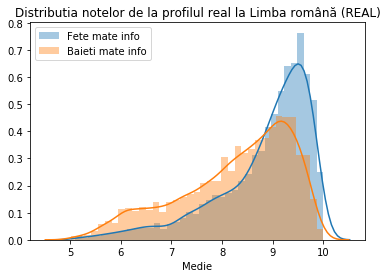

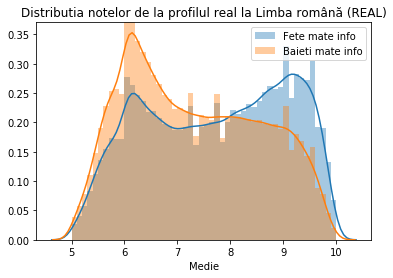

In [19]:
nume_subiect = ['Subiect ec', 'Subiect ed', 'Subiect ea']
nume_proba = ['Matematică MATE-INFO', 'Informatică MI C/C++', 'Limba română (REAL)']

for subiect, proba in zip(nume_subiect, nume_proba):
    fete_mate_info = data[(data['Sex'] == 'F') & (data[subiect] == proba)]
    baieti_mate_info = data[(data['Sex'] == 'M') & (data[subiect] == proba)]
    sns.distplot(fete_mate_info['Medie'], label='Fete mate info')
    sns.distplot(baieti_mate_info['Medie'], label='Baieti mate info')
    plt.title("Distributia notelor de la profilul real la " + subject)
    plt.legend()
    plt.show()
    plt.clf()

Sa examinam corelatia intre variabilele din setul de date. Cea mai vizibila este corelatia intre NOTA_E[A|B|C|D] si CONTESTATIE[A|B|C|D]

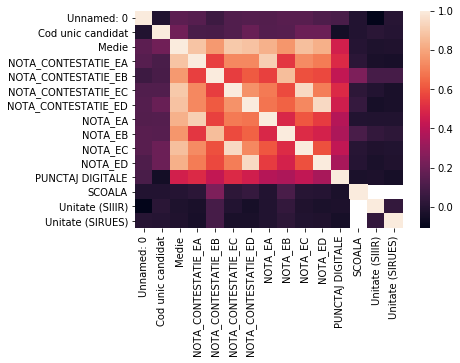

In [24]:
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)